## final project - udf analysis (4 pngs)

5) Get the f105w band image of the Hubble Ultra Deep Field, which is called

hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits

You can download it from https://archive.stsci.edu/pub/hlsp/hudf12/Links to an external site..

6) Redo the tutorial steps in a second notebook, but on the UDF f105w image. How many sources do you find? Histogram their fluxes.

7) What are the mean, median, and standard deviation of the distribution of fluxes. What is the largest outlier in the distribution, where is it on the image, and how many standard deviations is it away from the mean? 

8) Download the f125w and f160w images of the HUDF at the same website, and make a 3-color false image of the UDF using RGB -> f160w, f125w, f105w. Save the image as a PNG.

In [9]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt

# Load FITS image
from astropy.io import fits

data = fits.getdata("UDF f105w.fits").astype(float)
data = np.ascontiguousarray(data)

data.shape


(3600, 3600)

In [10]:
bkg = sep.Background(data)
data_sub = data - bkg

objects = sep.extract(data_sub, thresh=1.5 * bkg.globalrms)
print(len(objects))

8640


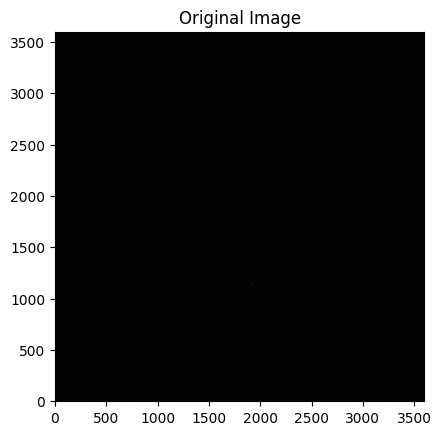

In [3]:
plt.imshow(data, cmap='gray', origin='lower')
plt.title("Original Image")
plt.savefig("tutorial_image.png")
plt.show()


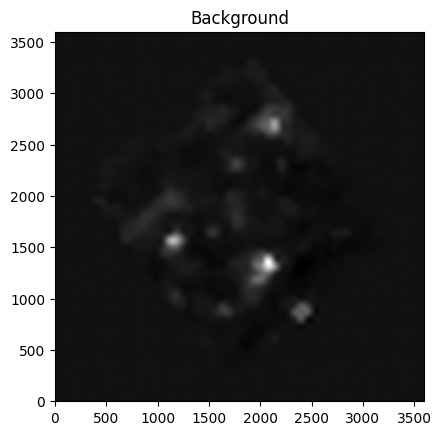

In [14]:
plt.imshow(bkg.back(), cmap='gray', origin='lower')
plt.title("Background")
plt.savefig("tutorial_background.png")
plt.show() 

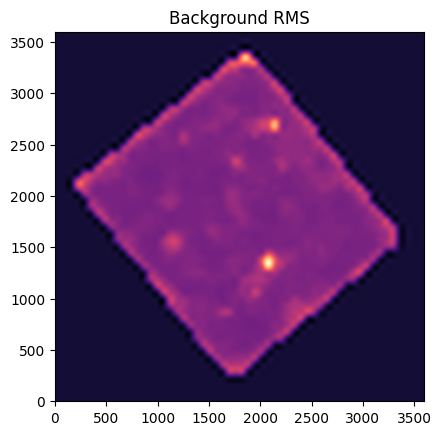

In [8]:
plt.imshow(bkg.rms(), cmap='magma', origin='lower')
plt.title("Background RMS")
plt.savefig("tutorial_rms.png")
plt.show()


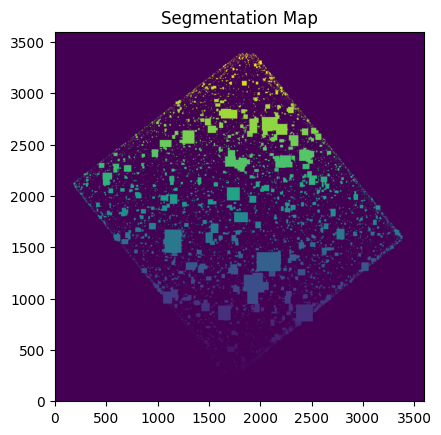

In [15]:
segmap = np.zeros_like(data, dtype=int)
for i, obj in enumerate(objects):
    segmap[obj['ymin']:obj['ymax'], obj['xmin']:obj['xmax']] = i+1

plt.imshow(segmap, origin='lower')
plt.title("Segmentation Map")
plt.savefig("tutorial_segmap.png")
plt.show()


In [16]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [17]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [18]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))
    

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


Number of sources detected: 8640


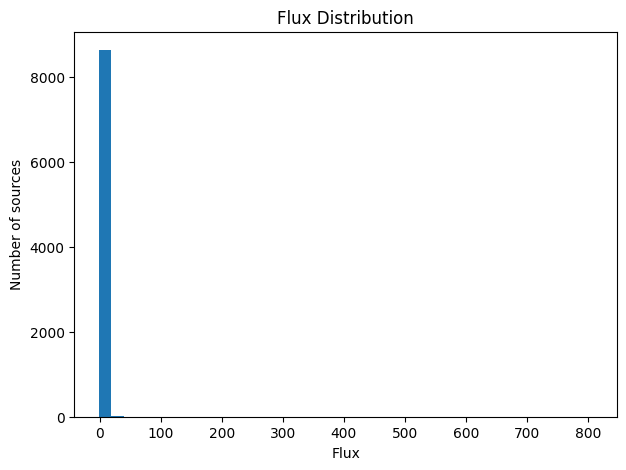

Mean flux: 0.361862000719017
Median flux: 0.030956558069156016
Std deviation: 9.243527842776762

Largest outlier flux: 807.2972835731507
Position (x,y): (np.float64(1914.2549094883857), np.float64(1134.3164850742164))
Z-score (std devs from mean): 87.29734310293674


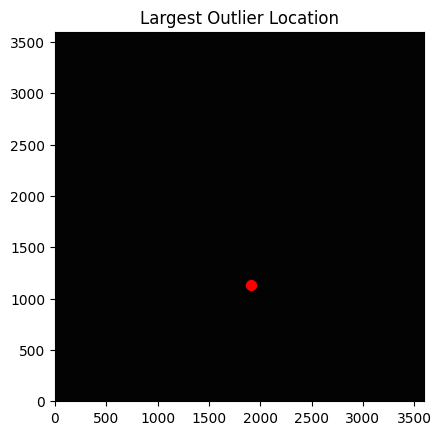

In [19]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt

bkg = sep.Background(data)
data_sub = data - bkg.back()

objects = sep.extract(data_sub, thresh=1.5 * bkg.globalrms)
print("Number of sources detected:", len(objects))


flux, fluxerr, flag = sep.sum_circle(
    data_sub,
    objects['x'],
    objects['y'],
    3.0,              # 3-pix radius
    err=bkg.globalrms,
    gain=1.0
)


plt.figure(figsize=(7,5))
plt.hist(flux, bins=40)
plt.xlabel("Flux")
plt.ylabel("Number of sources")
plt.title("Flux Distribution")
plt.show()


mean_flux = np.mean(flux)
median_flux = np.median(flux)
std_flux = np.std(flux)

print("Mean flux:", mean_flux)
print("Median flux:", median_flux)
print("Std deviation:", std_flux)


max_flux = np.max(flux)
max_index = np.argmax(flux)

max_x = objects['x'][max_index]
max_y = objects['y'][max_index]

zscore = (max_flux - mean_flux) / std_flux

print("\nLargest outlier flux:", max_flux)
print("Position (x,y):", (max_x, max_y))
print("Z-score (std devs from mean):", zscore)

plt.imshow(data_sub, cmap='gray', origin='lower')
plt.scatter([max_x], [max_y], s=50, color='red')
plt.title("Largest Outlier Location")
plt.show()


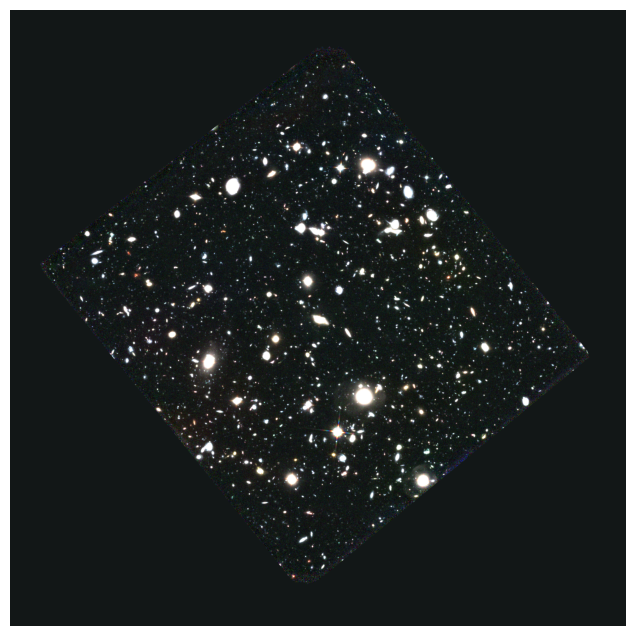

Saved 3-color HUDF image as HUDF_falsecolor.png


In [3]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

f160 = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits").astype(float)
f125 = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits").astype(float)
f105 = fits.getdata("UDF f105w.fits").astype(float)

def norm(img, pmin=1, pmax=99):
    vmin, vmax = np.percentile(img, (pmin, pmax))
    img = np.clip((img - vmin) / (vmax - vmin), 0, 1)
    return img

R = norm(f160)
G = norm(f125)
B = norm(f105)

rgb = np.dstack([R, G, B])

plt.figure(figsize=(8,8))
plt.imshow(rgb, origin='lower')
plt.axis('off')

plt.savefig("HUDF_falsecolor.png", dpi=300, bbox_inches='tight')
plt.show()

print("Saved 3-color HUDF image as HUDF_falsecolor.png")